In [11]:
import numpy as np
import pandas as pd
import shutil
pd.set_option("display.max_rows", 101)
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.rcParams["font.size"] = 15
import seaborn as sns

In [2]:
base_path = 'D:/Downloads/train_images'
labels_path = 'train.csv'

In [3]:
train_df = pd.read_csv(labels_path)
train_df = train_df.drop(['EncodedPixels'], axis=1)

In [4]:
train_df.head()

,ImageId,ClassId
0,0002cc93b.jpg,1
1,0007a71bf.jpg,3
2,000a4bcdd.jpg,1
3,000f6bf48.jpg,4
4,0014fce06.jpg,3


In [5]:
dic = {}
for i in range(len(train_df)):
    temp = train_df.iloc[i]
    imageId = temp['ImageId']
    classId = temp['ClassId']
    dic[imageId] = classId

In [6]:
all_images = os.listdir(base_path)
len(all_images)

12568

In [7]:
class_dic = {}
class_dic[0] = []
class_dic[1] = []
countOfImagesWithoutDefects = 0
countOfImagesWithDefects = 0
for image in all_images:
    if image not in dic.keys():
        countOfImagesWithoutDefects += 1
        class_dic[1].append(image)
    else:
        countOfImagesWithDefects += 1
        class_dic[0].append(image)
class_count_dic = {'defect':countOfImagesWithDefects, 'no-defect':countOfImagesWithoutDefects}

In [8]:
print("the number of images with no defects: {}".format(countOfImagesWithoutDefects))
print("the number of images with defects: {}".format(countOfImagesWithDefects))

the number of images with no defects: 5902
the number of images with defects: 6666


{'defect': 6666, 'no-defect': 5902}

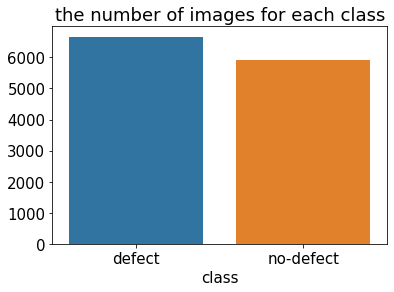

In [12]:
fig, ax = plt.subplots()
sns.barplot(x=list(class_count_dic.keys()), y=list(class_count_dic.values()), ax=ax)
ax.set_title("the number of images for each class")
ax.set_xlabel("class")
class_count_dic

**************************************Images of steel with deformation**********************************************


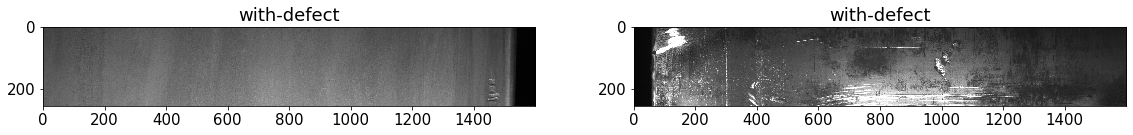

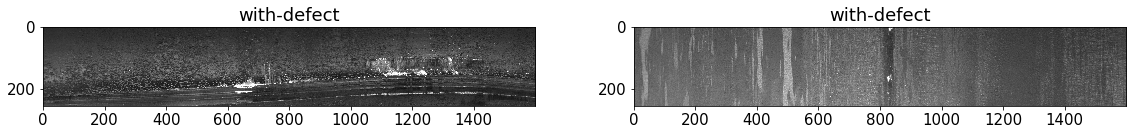

In [22]:
##Displaying images with defect
random_defect_images_indices = np.random.randint(0, countOfImagesWithDefects, 4)
random_defect_images = [os.path.join(base_path, class_dic[0][index]) for index in random_defect_images_indices]
print('**************************************Images of steel with deformation**********************************************')
imindex = 0
for i in range(2):
    fig = plt.figure(figsize=(30, 30))
    for j in range(2):
        axisarr = fig.add_subplot(3, 3, j+1)
        axisarr.imshow(mpimg.imread(random_defect_images[imindex]))
        axisarr.set_title('with-defect')
        imindex += 1
plt.show()

**************************************Images of steel without deformation**********************************************


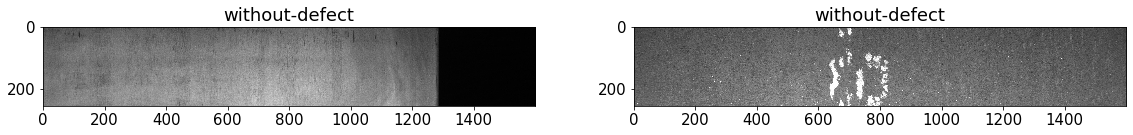

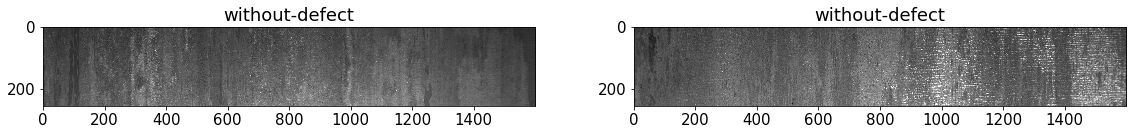

In [25]:
##Displaying images without defect
random_without_defect_images_indices = np.random.randint(0, countOfImagesWithoutDefects, 4)
random_without_defect_images = [os.path.join(base_path, class_dic[1][index]) for index in random_without_defect_images_indices]
print('**************************************Images of steel without deformation**********************************************')
imindex = 0
for i in range(2):
    fig = plt.figure(figsize=(30, 30))
    for j in range(2):
        axisarr = fig.add_subplot(3, 3, j+1)
        axisarr.imshow(mpimg.imread(random_without_defect_images[imindex]))
        axisarr.set_title('without-defect')
        imindex += 1
plt.show()

In [115]:
cv2.imread(random_without_defect_images[1]).shape

(256, 1600, 3)

In [118]:
os.mkdir('data')
os.mkdir('data/train')
os.mkdir('data/test')
os.mkdir('data/visualization')

os.mkdir('data/train/defect')
os.mkdir('data/train/no defect')
os.mkdir('data/test/defect')
os.mkdir('data/test/no defect')
os.mkdir('data/visualization/real_images')

In [150]:
#75% of total defect images will go in training and rest in testing and same for without defect images
for key in class_dic.keys():
    split_ratio = 0.75
    train_size = int(len(class_dic[key]) * split_ratio)
    
    train_images = class_dic[key][0 : train_size]
    test_images = class_dic[key][train_size : ]
    
    train_dest_path = 'data/'
    test_dest_path = 'data/'
    if(key == 0):
        train_dest_path = train_dest_path + 'train/defect'
        test_dest_path = test_dest_path + 'test/defect'
    else:
        train_dest_path = train_dest_path + 'train/no defect'
        test_dest_path = test_dest_path + 'test/no defect'
    
    #copy training images
    for image in train_images:
        shutil.copy(os.path.join(base_path, image), os.path.join(train_dest_path, image))
    
    for image in test_images:
        shutil.copy(os.path.join(base_path, image), os.path.join(test_dest_path, image))

In [160]:
#import keras and different type of layers for for defining CNN models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.metrics import Precision, Recall

In [162]:
lenetModel = Sequential()
lenetModel.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', input_shape=(256, 800, 3)))
lenetModel.add(Activation('relu'))
lenetModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

lenetModel.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel.add(Activation('relu'))
lenetModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
lenetModel.add(Dense(120))
lenetModel.add(Activation('relu'))
lenetModel.add(Dense(units=84))
lenetModel.add(Activation('relu'))

lenetModel.add(Dense(1)) # this our output layer (since this is binary classification of cracked or uncracked, we use only one unit in output layer).
lenetModel.add(Activation('sigmoid'))

lenetModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
lenetModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 252, 796, 6)       456       
_________________________________________________________________
activation_6 (Activation)    (None, 252, 796, 6)       0         
_________________________________________________________________
average_pooling2d_3 (Average (None, 126, 398, 6)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 394, 16)      2416      
_________________________________________________________________
activation_7 (Activation)    (None, 122, 394, 16)      0         
_________________________________________________________________
average_pooling2d_4 (Average (None, 61, 197, 16)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 192272)           

In [163]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32

# this is the augmentation configuration we will use for training
#here along with rescaling, we are also changing the orientation of the image in only training dataset, 
#this is we are doing so that our model never sees the same image, and this will help in fighting overfitting.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing, validation, visualization:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'master_data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(256, 800),  # all images will be resized to 227*227
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for test data
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(256, 800),
        batch_size=batch_size,
        class_mode='binary')

Found 9425 images belonging to 2 classes.
Found 3143 images belonging to 2 classes.


In [164]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [165]:
import time
start_time = time.time() 
history = lenetModel.fit_generator(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        callbacks=[es]
)
finish_time = time.time()
time_taken = finish_time-start_time
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken // 60, time_taken % 60))


Epoch 1/10
295/295 [==============================] - 392s 1s/step - loss: 0.6985 - accuracy: 0.6630 - precision_2: 0.6874 - recall_2: 0.5181 - val_loss: 0.3696 - val_accuracy: 0.7340 - val_precision_2: 0.7925 - val_recall_2: 0.5874
Epoch 2/10
295/295 [==============================] - 369s 1s/step - loss: 0.4898 - accuracy: 0.7451 - precision_2: 0.7776 - recall_2: 0.6405 - val_loss: 0.3458 - val_accuracy: 0.7531 - val_precision_2: 0.6915 - val_recall_2: 0.8564
Epoch 3/10
295/295 [==============================] - 380s 1s/step - loss: 0.4448 - accuracy: 0.7694 - precision_2: 0.7834 - recall_2: 0.7036 - val_loss: 0.4386 - val_accuracy: 0.7859 - val_precision_2: 0.8633 - val_recall_2: 0.6463
Epoch 4/10
295/295 [==============================] - 388s 1s/step - loss: 0.4382 - accuracy: 0.7803 - precision_2: 0.7788 - recall_2: 0.7431 - val_loss: 0.7359 - val_accuracy: 0.7932 - val_precision_2: 0.8668 - val_recall_2: 0.6612
Epoch 5/10
295/295 [==============================] - 392s 1s/step 

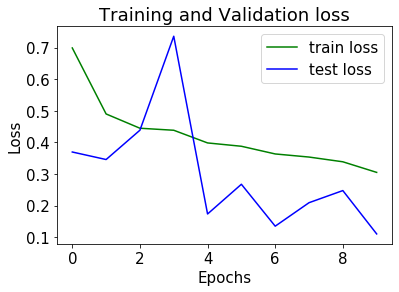

In [167]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='train loss')
plt.plot(epochs, loss_val, 'b', label='test loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

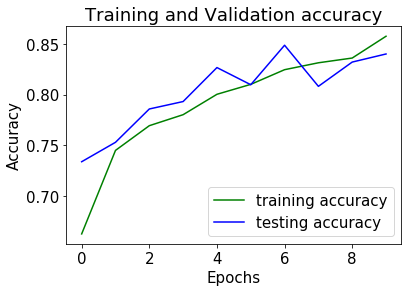

In [168]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, accuracy_train, 'g', label='training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='testing accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

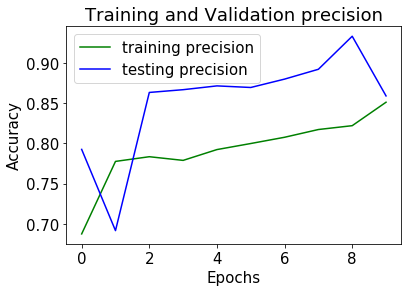

In [169]:
precision_train = history.history['precision_2']
precision_val = history.history['val_precision_2']
epochs = range(0,10)
plt.plot(epochs, precision_train, 'g', label='training precision')
plt.plot(epochs, precision_val, 'b', label='testing precision')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

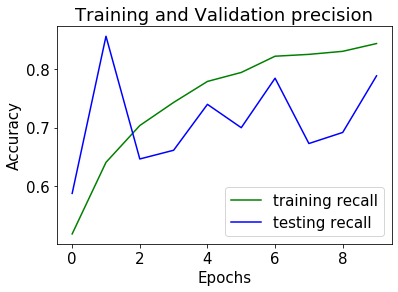

In [170]:
recall_train = history.history['recall_2']
recall_val = history.history['val_recall_2']
epochs = range(0,10)
plt.plot(epochs, recall_train, 'g', label='training recall')
plt.plot(epochs, recall_val, 'b', label='testing recall')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [171]:
lenetModel.save_weights('lenetModelWeights.h5')